In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import data_postprocessing as dpp

In [3]:
eegData = dpp.eegData(path='Sams')

In [ ]:
# can try removing more or fewer channels in code to see what happens with spectrogram noise and ML performance
eegData.load_clean_all_data()

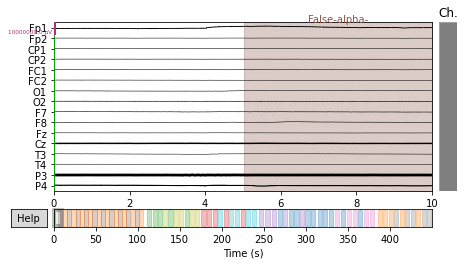

In [5]:
_ = eegData.data.plot(scalings=5)

Sam's todo:

In [4]:
eegData.load_clean_one_dataset(r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-3.2-22-2021_raw.fif.gz")

Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-3.2-22-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...


In [5]:
eegData.create_alpha_spectrograms()  # gets called from plot_all_alpha_specs if not already done

Used Annotations descriptions: ['False-alpha-']
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-alpha-']
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True


Used Annotations descriptions: ['False-alpha-']
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-alpha-']
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True
False : 0


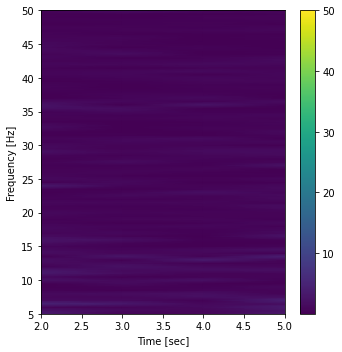

False : 1


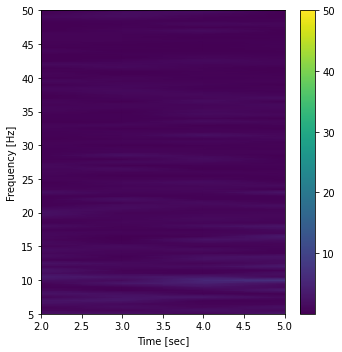

False : 2


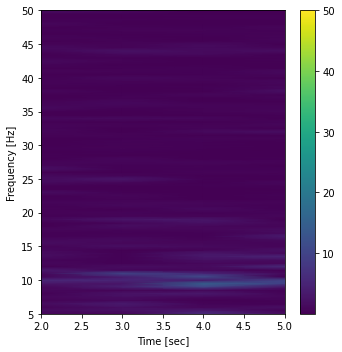

False : 3


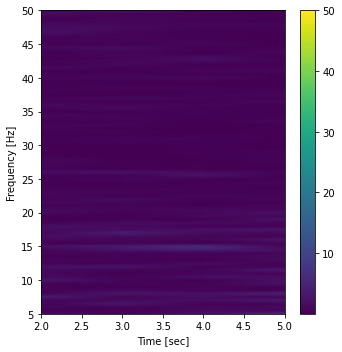

False : 4


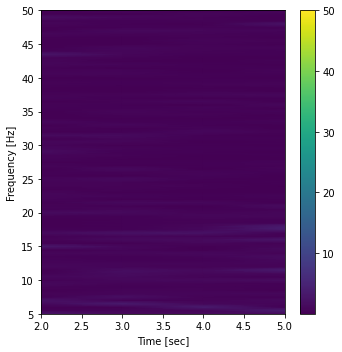

False : 5


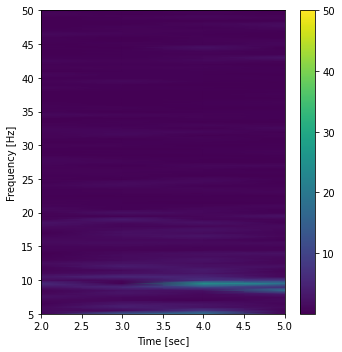

False : 6


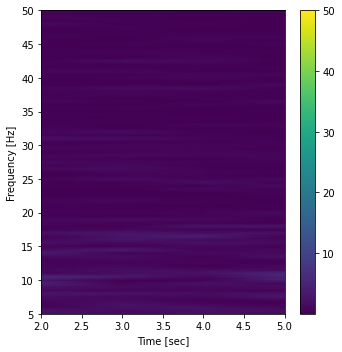

False : 7


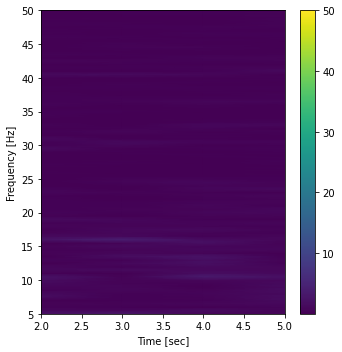

False : 8


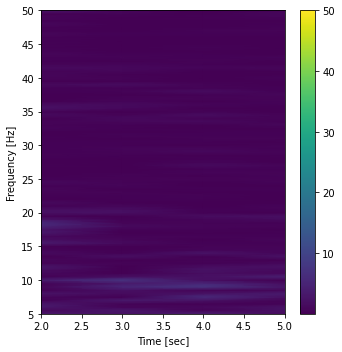

False : 9


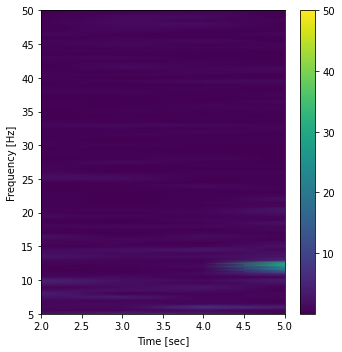

True : 0


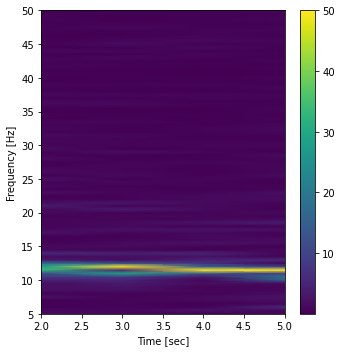

True : 1


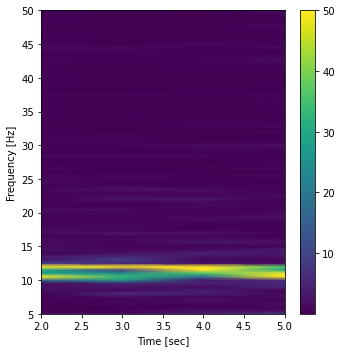

True : 2


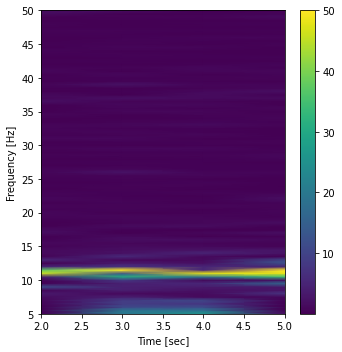

True : 3


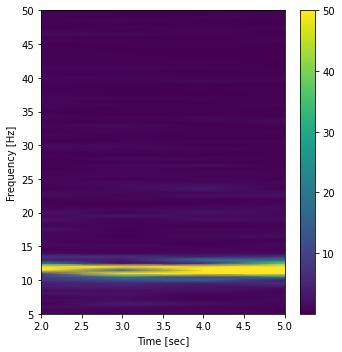

True : 4


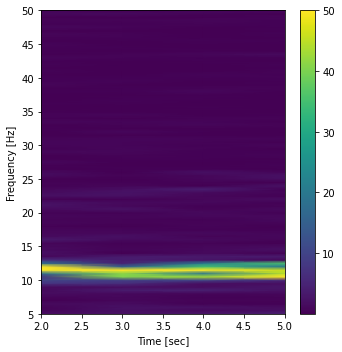

True : 5


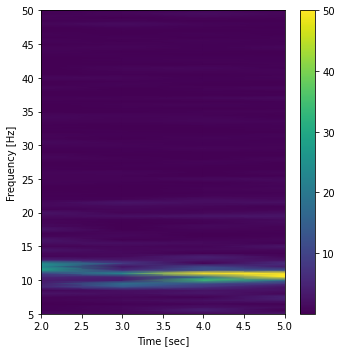

True : 6


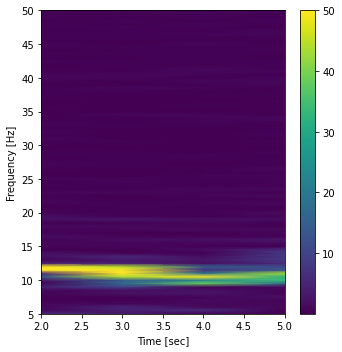

True : 7


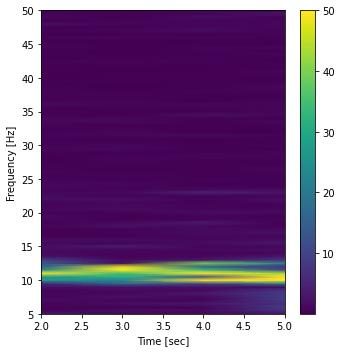

True : 8


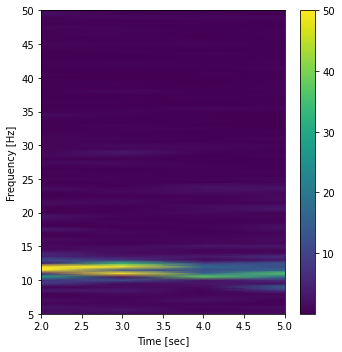

True : 9


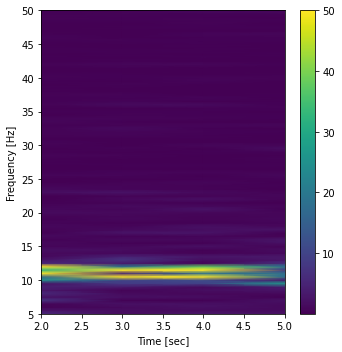

In [6]:
eegData.plot_all_alpha_spectrograms()

In [ ]:
eegData.create_SSVEP_spectrograms()  # gets called from plot_all_ssvep_specs if not already done
eegData.plot_all_SSVEP_spectrograms()
eegData.prepare_SSVEP_data_for_ml()
eegData.fit_SSVEP_ML_and_report()

Nate's todo:

In [ ]:
eegData.fit_motor_imagery_and_report()
eegData.fit_motor_actual_and_report()
eegData.fit_laryngeal_imagery_and_report()
eegData.fit_laryngeal_actual_and_report()


# functions for making figures
# eegData.raw_data_figure()
# eegData.alpha_wave_figure()
# eegData.SSVEP_figure()
eegData.motor_spectrogram_figures()  # one for actual, one for imagery
eegData.laryngeal_spectrogram_figures()  # one for actual, one for imagery
eegData.csp_figures()  # MI, MA, LI, LA CSP figures